In [3]:
# Implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs

In [9]:
x, y = make_blobs(n_samples=1000,n_features=2,centers=5,random_state=6)



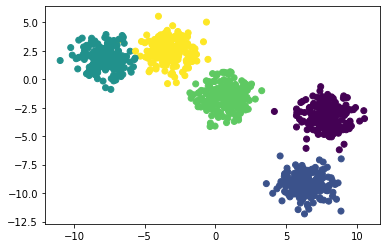

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [10]:
k=5 #centers
colors=['green','red','blue','yellow','gray']
clusters={}
for each_cluster in range(k):
    #1. Initialise cluster centers randomly
    #We will use numpy's random here to do that 
    center = 10*(2*np.random.random((x.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color' : colors[each_cluster]
    }
    clusters[each_cluster] = cluster

In [11]:
10*(2*np.random.random((x.shape[1],))-1) #since we need values should lie in the range from -10 to 10 hence this multiplication as shown in graph 

array([-7.65643738,  3.32025144])

In [12]:
clusters

{0: {'center': array([-7.23322061, -4.88436658]),
  'points': [],
  'color': 'green'},
 1: {'center': array([4.11902936, 6.88128007]), 'points': [], 'color': 'red'},
 2: {'center': array([-0.13722355,  9.73747847]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 5.0034239 , -2.67761654]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([5.40713745, 4.52460539]), 'points': [], 'color': 'gray'}}

In [47]:
# to find out the distance and assigning points to the clusters

In [14]:
def distance(v1,v2):
    return np.sqrt(np.sum(v1-v2)**2)

In [15]:
# Assigning every data point to one of the cluster 
# or find the minimum distance from each cluster point
# E -  step Expectation step (EM algo)
def assignPointsToCluster(clusters):
    
    for every_data_point in range (x.shape[0]):
        dist=[]
        current_x = x[every_data_point]
        for every_cluster in range(k):
            d = distance(current_x,clusters[every_cluster]['center'])
            dist.append(d)
        
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(x[every_data_point])
            

In [29]:
# Maximisation step 
#To update the cluster center by taking mean 

def updateClusters(clusters):
    for every_cluster_center in range(k):
        pts = np.array(clusters[every_cluster_center]['points'])
    
        if pts.shape[0]>0:
            #We will find out the mean
            new_u = pts.mean(axis=0)
            clusters[every_cluster_center]['center'] = new_u
            clusters[every_cluster_center]['points'] = []
            

In [30]:
def plotCluster(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],color='black',marker='*')

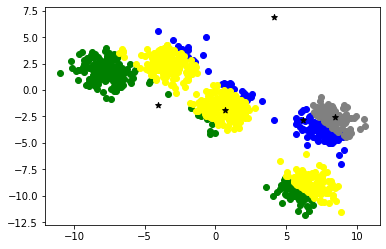

In [38]:
assignPointsToCluster(clusters)
plotCluster(clusters)
updateClusters(clusters)